In [1]:
#importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

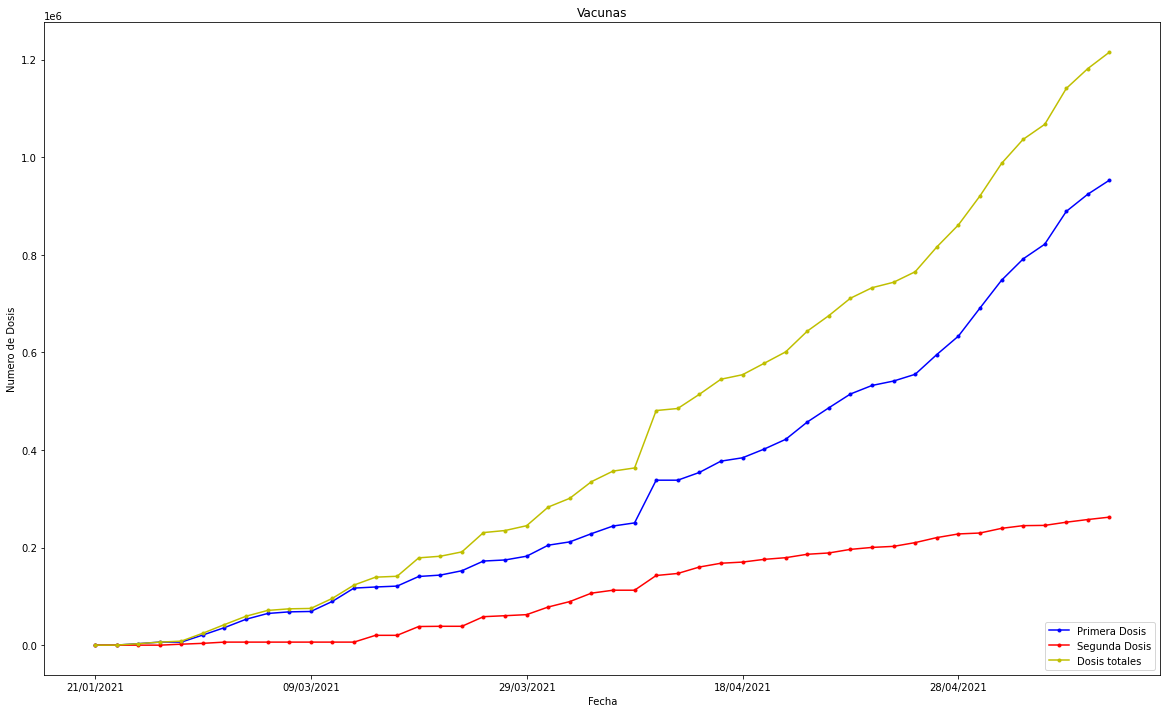

In [2]:
datos = pd.read_csv('vacunas.csv')

plt.figure(figsize=(20,12))
plt.title('Vacunas')

plt.plot(datos.fecha, datos.primera_dosis, 'b.-')
plt.plot(datos.fecha, datos.segunda_dosis, 'r.-')
plt.plot(datos.fecha, datos.dosis_total, 'y.-')

plt.xticks(datos.fecha[::10].tolist())

plt.xlabel('Fecha')
plt.ylabel('Numero de Dosis')
plt.legend(['Primera Dosis','Segunda Dosis', 'Dosis totales'], loc='lower right')
plt.show()

In [3]:
#Trabajar con otro tipo de datos Fifa
fabricante = pd.read_csv('fabricantes.csv')
#imprimir los primeros 5 datos del archivo
fabricante.head(5)

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021


Total de la vacuna Pfizer/BioNTech:  659880
Total de la vacuna Sinovac:  1020000
Total de la vacuna Oxford/AstraZeneca:  420000


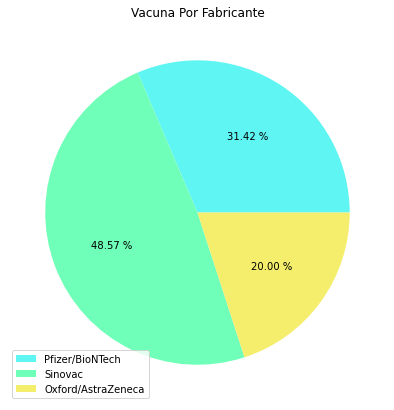

In [4]:
# Generar un grafico de cual es su pie diestro
PF = fabricante.loc[fabricante['vaccine'] == 'Pfizer/BioNTech']
lista = [list(row) for row in PF.values]
vacuna1=0
for v1 in lista:
    vacuna1=vacuna1+v1[1]

print("Total de la vacuna Pfizer/BioNTech: ",vacuna1)

S = fabricante.loc[fabricante['vaccine'] == 'Sinovac']
lista1 = [list(row) for row in S.values]
vacuna2=0
for v2 in lista1:
    vacuna2=vacuna2+v2[1]

print("Total de la vacuna Sinovac: ",vacuna2)

OA = fabricante.loc[fabricante['vaccine'] == 'Oxford/AstraZeneca']
lista2 = [list(row) for row in OA.values]
vacuna3=0
for v3 in lista2:
    vacuna3=vacuna3+v3[1]

print("Total de la vacuna Oxford/AstraZeneca: ",vacuna3)


plt.figure(figsize=(10,7))

#etiquetas = ['Pfizer/BioNTech.', 'Sinovac.', 'Oxford/AstraZeneca.']
colores = ['#5FF5F3', '#70FFB8', '#F5EE6C']
plt.pie([vacuna1, vacuna2, vacuna3], colors=colores, autopct='%.2f %%')
plt.title('Vacuna Por Fabricante')
plt.legend(['Pfizer/BioNTech','Sinovac', 'Oxford/AstraZeneca'], loc='lower left')
plt.show()

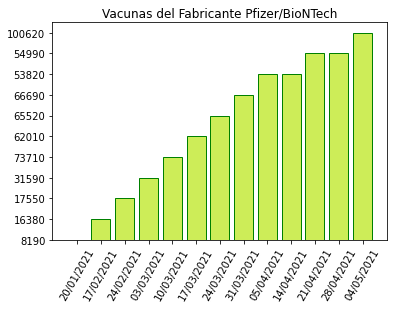

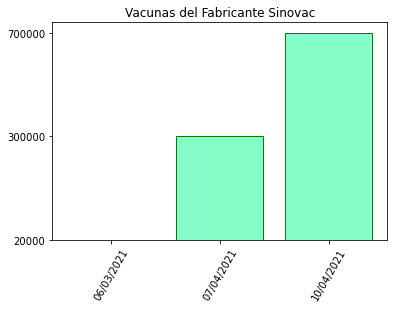

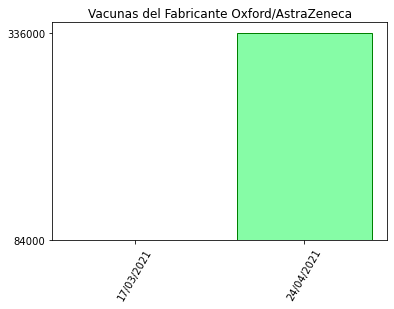

In [5]:
fechas1 = []
total1 = []
for v1 in lista:
    texto1=str(v1[2])
    fechas1.append(texto1)
    texto2=str(v1[1])
    total1.append(texto2)
    
plt.bar(range(13), total1, edgecolor='green',color='#CDED58')
plt.xticks(range(13), fechas1, rotation=60)
plt.title("Vacunas del Fabricante Pfizer/BioNTech")
plt.show()

fechas2 = []
total2 = []
for v1 in lista1:
    texto1=str(v1[2])
    fechas2.append(texto1)
    texto2=str(v1[1])
    total2.append(texto2)
    
plt.bar(range(3), total2, edgecolor='green',color='#86FCC9')
plt.xticks(range(3), fechas2, rotation=60)
plt.title("Vacunas del Fabricante Sinovac")
plt.show()

fechas3 = []
total3 = []
for v1 in lista2:
    texto1=str(v1[2])
    fechas3.append(texto1)
    texto2=str(v1[1])
    total3.append(texto2)
    
plt.bar(range(2), total3, edgecolor='green',color='#86FCA6')
plt.xticks(range(2), fechas3, rotation=60)
plt.title("Vacunas del Fabricante Oxford/AstraZeneca")
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model

planVacunarse = pd.read_csv('vacunas_planvacunarse.csv')
planVacunarse.head(5)

,fecha,primera_dosis,segunda_dosis
0,2021-01-21,1500,0
1,2021-01-22,538,1
2,2021-01-23,31,0
3,2021-01-24,0,0
4,2021-01-25,622,0


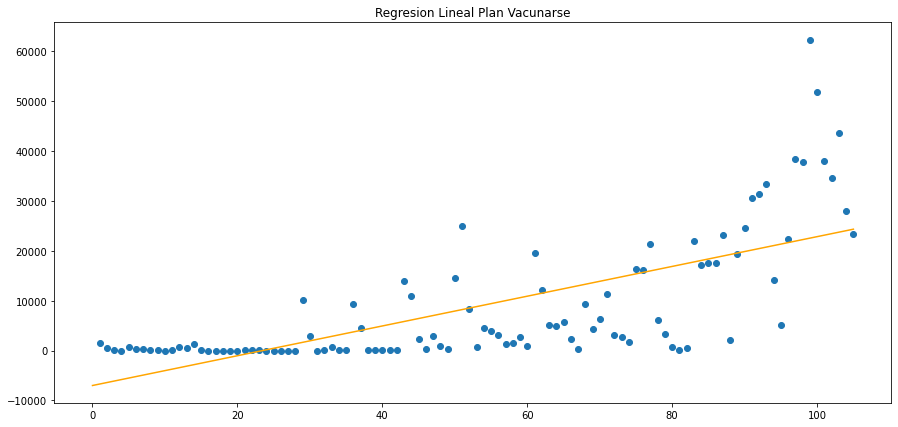

Prediccion de la Primera Dosis: 24002.981304858666
Prediccion de la Segunda Dosis: 24301.1432165319


In [7]:
primera_dosis = planVacunarse.loc[:]['primera_dosis']
segunda_dosis = planVacunarse.loc[:]['segunda_dosis']
                                             
x = range(1,len(primera_dosis)+1)
y = primera_dosis
z = segunda_dosis

plt.figure(figsize=(15,7))
plt.title('Regresion Lineal Plan Vacunarse')
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
y_prediccion = regr.predict([[107]]) 
plt.scatter(x,y)

x_real = np.array(range(0, 106)) 
ypred = regr.predict(x_real.reshape(-1, 1))


plt.plot(x_real, ypred, color='orange')
plt.show()

print("Prediccion de la Primera Dosis: "+str(ypred[len(ypred)-2]))
print("Prediccion de la Segunda Dosis: "+str(ypred[len(ypred)-1]))

[0.06954493 3.98464758]


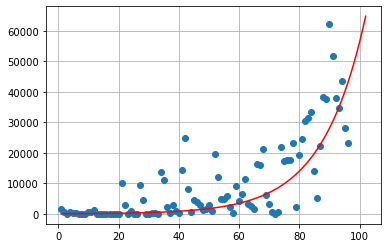

In [8]:
ndf= planVacunarse.loc[(planVacunarse['primera_dosis'] != 0)]
ndf1=ndf[['fecha','primera_dosis']]
x=np.arange(1,len(ndf1)+1,1, dtype='float')
y=np.array(ndf1.values[:,1], dtype='float')
x2=np.arange(1,len(ndf1)+1,1)
y2=np.array(ndf1.values[:,1])



curve_fit=np.polyfit(x2, np.log(y), deg=1)
print(curve_fit)
pred_x=np.array(list(range(min(x2), max(x2)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_x)
plt.plot(x2,y2,'o')
plt.plot(pred_x,yx, color="red")
plt.grid(True)

          4           3         2
0.001068 x - 0.05587 x - 2.041 x + 230.1 x - 1178


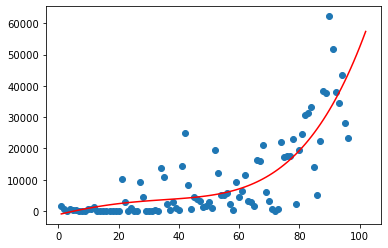

In [9]:
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.scatter(x, y) 
x1=np.arange(1,len(ndf1)+7,1, dtype='float')
plt.plot(x1, fun1(x1), c='r')  
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from datetime import datetime,timedelta
import sympy as sp
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import fsolve
from sklearn import linear_model

In [11]:
def modelo_logistico(x2,a,b):
    return a+b*np.log(x2)

exp_fit = curve_fit(modelo_logistico,x2,y2)

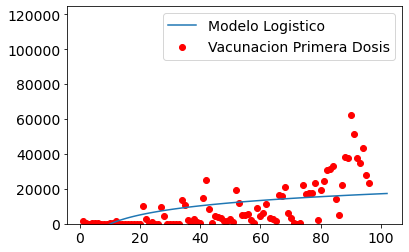

In [12]:
pred_x = list(range(min(x2),max(x2)+7))
plt.rc('font', size=14)
plt.scatter(x2,y2,label="Vacunacion Primera Dosis",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.ylim(0,max(y)*2)
plt.show()